In [2]:
import monkdata as m
import dtree as dt
import drawtree_qt5 as qt

Assignment 1

In [18]:
result_monk1=dt.entropy(m.monk1)
result_monk2=dt.entropy(m.monk2)
result_monk3=dt.entropy(m.monk3)

Assignment 3

In [19]:

monk_1_gains=[dt.averageGain(m.monk1,attribute) for attribute in m.attributes]
monk_2_gains=[dt.averageGain(m.monk2,attribute) for attribute in m.attributes]
monk_3_gains=[dt.averageGain(m.monk3,attribute) for attribute in m.attributes]
print(f'The best information gain for monk1 is : {max(monk_1_gains)} \n The best information gain for monk2 is : {max(monk_2_gains)} \n The best information gian for monk3 is : {max(monk_1_gains)}')
a=max(monk_1_gains)
print(f'The attribute with the highest information gain is : {monk_1_gains.index(a)+1}')

The best information gain for monk1 is : 0.28703074971578435 
 The best information gain for monk2 is : 0.01727717693791797 
 The best information gian for monk3 is : 0.28703074971578435
The attribute with the highest information gain is : 5


Pre asignment task 5 before the actual one

In [20]:

#Attribute('A5', (1, 2, 3, 4))

"Here we return all subsets that contain the attribute 5 "
subset_on_1=dt.select(m.monk1,m.attributes[4],1)
subset_on_2=dt.select(m.monk1,m.attributes[4],2)
subset_on_3=dt.select(m.monk1,m.attributes[4],3)
subset_on_4=dt.select(m.monk1,m.attributes[4],4)

"Now we need to check the split or branch with the higest information gain, i.e the one we want to actually split on"

possible_splits=[subset_on_1,subset_on_2,subset_on_3,subset_on_4]

subset_labels = [1, 2, 3, 4]

for val, subset in zip(subset_labels, possible_splits):
    for attr in m.attributes:
        if attr != m.attributes[4]:
            info_gain = dt.averageGain(subset, attr)
            print(f'For subset A5={val}, attribute {attr} has information_gain={info_gain}')



# We should split on the branch where A5=4 and then split on attribute A1.

"Find the most common label"
mcommon=dt.mostCommon(m.monk1)
#print(mcommon) #false

"Now we know to split on A1 since it had the highest information gain, now we simply acces the subsets of 4-A1=value?"
#Attribute('A1', (1, 2, 3))
sub_A5_4_A1_1=dt.select(subset_on_4,m.attributes[0],1)
sub_A5_4_A1_2=dt.select(subset_on_4,m.attributes[0],2)
sub_A5_4_A1_3=dt.select(subset_on_4,m.attributes[0],3)

"Now we have a 2-level tree with leaf nodes assigned"
leaf_label_4_A1_1=dt.mostCommon(sub_A5_4_A1_1)
leaf_label_4_A1_2=dt.mostCommon(sub_A5_4_A1_2)
leaf_label_4_A1_3=dt.mostCommon(sub_A5_4_A1_3)


graph=dt.buildTree(m.monk1,m.attributes,2)
print(graph)

qt.drawTree(graph)





For subset A5=1, attribute A1 has information_gain=0.0
For subset A5=1, attribute A2 has information_gain=0.0
For subset A5=1, attribute A3 has information_gain=0.0
For subset A5=1, attribute A4 has information_gain=0.0
For subset A5=1, attribute A6 has information_gain=0.0
For subset A5=2, attribute A1 has information_gain=0.040216841609413634
For subset A5=2, attribute A2 has information_gain=0.015063475072186083
For subset A5=2, attribute A3 has information_gain=0.03727262736015946
For subset A5=2, attribute A4 has information_gain=0.04889220262952931
For subset A5=2, attribute A6 has information_gain=0.025807284723902146
For subset A5=3, attribute A1 has information_gain=0.03305510013455182
For subset A5=3, attribute A2 has information_gain=0.002197183539100922
For subset A5=3, attribute A3 has information_gain=0.017982293842278896
For subset A5=3, attribute A4 has information_gain=0.01912275517747053
For subset A5=3, attribute A6 has information_gain=0.04510853782483648
For subset

SystemExit: 0

/Users/hej/MachineLearning-DD2421/my_temp_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


##Assignment 5:

 Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and test datasets.
For example to built a tree for monk1 and compute the performance on the test data you could use


import monkdata as m
import dtree as d

t=d.buildTree(m.monk1, m.attributes);
print(d.check(t, m.monk1test))

print(d.check(t, m.monk1test))

Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.


In [22]:
tree_monk1= dt.buildTree(m.monk1, m.attributes)
tree_monk2= dt.buildTree(m.monk2, m.attributes)
tree_monk3= dt.buildTree(m.monk3, m.attributes)


print('Train errors ')
print(1-dt.check(tree_monk1, m.monk1))
print(1-dt.check(tree_monk2, m.monk2))
print(1-dt.check(tree_monk3, m.monk3))

print('\n')
print('Test errors')
print(1-dt.check(tree_monk1, m.monk1test))
print(1-dt.check(tree_monk2, m.monk2test))
print(1-dt.check(tree_monk3, m.monk3test))



#qt.drawTree(tree_monk2)



Train errors 
0.0
0.0
0.0


Test errors
0.17129629629629628
0.30787037037037035
0.05555555555555558


##Assignment 6^****


In [4]:
import statistics


import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


"Here we need to check if the current dataset can be pruned to improve accuracy"

def pruning_tree(train_data_monk1,val_data_monk1,attributes):
    current_tree=dt.buildTree(train_data_monk1,attributes)
    current_accuracy = dt.check(current_tree, val_data_monk1)
    #pruning replaces node with on of the attributes. We need to check if replacing improves accuracy or is redundant 
    while True:
        pruned_trees=dt.allPruned(current_tree)
        if not pruned_trees:
            break
        found_better=False

        for pruned_tree in pruned_trees:
            pruned_accuracy=dt.check(pruned_tree,val_data_monk1)

            if pruned_accuracy>=current_accuracy:
                current_tree=pruned_tree
                current_accuracy=pruned_accuracy
                found_better=True
               # print('Succes')
                break
            
        if found_better==False:
            break
    return current_tree
        

train_data_monk1,val_data_monk1=partition(m.monk1,0.6)

train_data_monk2,val_data_monk2=partition(m.monk2,0.6)

train_data_monk3,val_data_monk3=partition(m.monk3,0.6)


pruned_tree1=pruning_tree(train_data_monk1,val_data_monk1,m.attributes)
pruned_tree2=pruning_tree(train_data_monk2,val_data_monk2,m.attributes)
pruned_tree3=pruning_tree(train_data_monk3,val_data_monk3,m.attributes)



#------------------Monk1----------------------
final_train_acc_monk1 = dt.check(pruned_tree1, train_data_monk1)
final_val_acc_monk1   = dt.check(pruned_tree1, val_data_monk1)
final_test_acc_monk1  = dt.check(pruned_tree1, m.monk1test)
print(f'The accuracy for monk1 : On training data :{final_train_acc_monk1},On validation data: {final_val_acc_monk1}, On test data: {final_test_acc_monk1} \n')

#-----------------Monk2----------------------------

final_train_acc_monk2 = dt.check(pruned_tree2, train_data_monk1)
final_val_acc_monk2 = dt.check(pruned_tree2, val_data_monk1)
final_test_acc_monk2  = dt.check(pruned_tree2, m.monk2test)
print(f'The accuracy for monk2 :  On training data : {final_train_acc_monk2},On validation data: {final_val_acc_monk2},On test data:  {final_test_acc_monk2} \n')

#------------------Monk3------------------------

final_train_acc_monk3 = dt.check(pruned_tree3, train_data_monk1)
final_val_acc_monk3 = dt.check(pruned_tree3, val_data_monk1)
final_test_acc_monk3  = dt.check(pruned_tree3, m.monk3test)
print(f'The accuracy for monk3 : On training data : {final_train_acc_monk3},On validation data: {final_val_acc_monk3},On test data: {final_test_acc_monk3}\n')


print(pruned_tree1)

#qt.drawTree(pruned_tree3)


The accuracy for monk1 : On training data :0.9054054054054054,On validation data: 0.9, On test data: 0.8611111111111112 

The accuracy for monk2 :  On training data : 0.5135135135135135,On validation data: 0.48,On test data:  0.6712962962962963 

The accuracy for monk3 : On training data : 0.5675675675675675,On validation data: 0.52,On test data: 1.0

A5(+-A1(A2(+--)A2(-+-)A2(--+))A1(-A2(-+-)A2(+-+)))


##Assignment 7

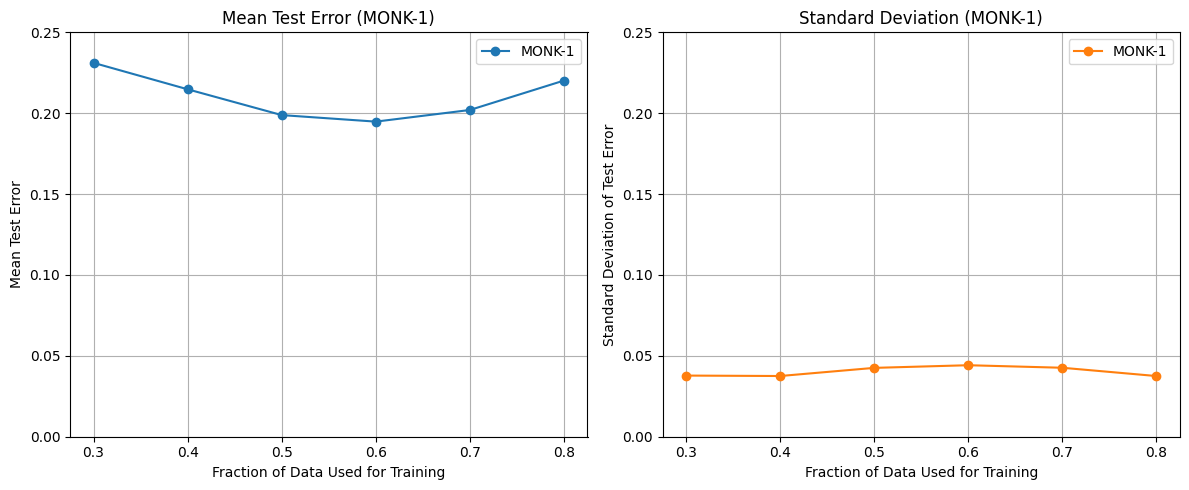

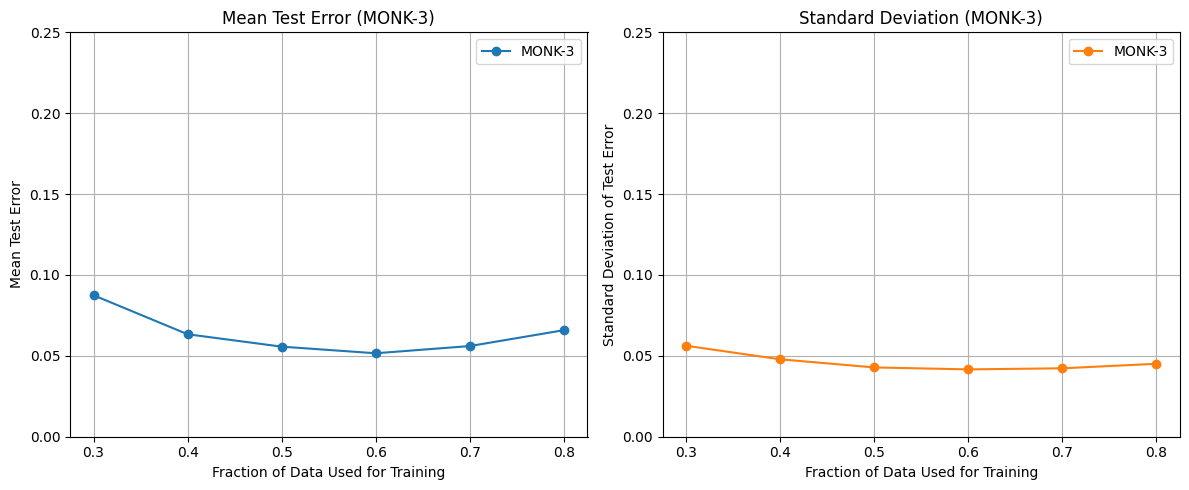

In [5]:
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np

def pruning_runs(monk, monk_test, runs):
    fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

    # For storing errors for each fraction
    fraction_dict_error = {}
    # Final dictionary: fraction -> (mean_error, stdev_error)
    final_result = {}

    for fraction in fractions:
        fraction_dict_error[fraction] = []
        for _ in range(runs):
            train_data, val_data = partition(monk, fraction)

            pruned = pruning_tree(train_data, val_data, m.attributes)

            accuracy = dt.check(pruned, monk_test)
            error = 1.0 - accuracy
            fraction_dict_error[fraction].append(error)

    # Compute mean and standard deviation for each fraction
    for fraction in fractions:
        mean_err = statistics.mean(fraction_dict_error[fraction])
        stdev_err = statistics.stdev(fraction_dict_error[fraction])
        final_result[fraction] = (mean_err, stdev_err)

    return final_result


monk1_results = pruning_runs(m.monk1, m.monk1test, runs=500)

monk3_results = pruning_runs(m.monk3, m.monk3test, runs=500)



def plot_separate_mean_stdev(results_dict, label):
    """
    Given a dictionary of {fraction: (mean_error, std_error)},
    create two separate plots:
      1) Mean test error vs. fraction
      2) Std dev of test error vs. fraction
    labeled by 'label'.
    """
    fractions = sorted(results_dict.keys())
    
    means = [results_dict[f][0] for f in fractions]
    stds  = [results_dict[f][1] for f in fractions]

    fig, (ax_mean, ax_std) = plt.subplots(1, 2, figsize=(12, 5))

    # --- Left Plot: Mean Error ---
    ax_mean.plot(fractions, means, marker='o', label=label)
    ax_mean.set_title(f"Mean Test Error ({label})")
    ax_mean.set_xlabel("Fraction of Data Used for Training")
    ax_mean.set_ylabel("Mean Test Error")
    ax_mean.set_ylim(0, 0.25)
    ax_mean.grid(True)
    ax_mean.legend()

    # --- Right Plot: Standard Deviation ---
    ax_std.plot(fractions, stds, marker='o', color='tab:orange', label=label)
    ax_std.set_title(f"Standard Deviation ({label})")
    ax_std.set_xlabel("Fraction of Data Used for Training")
    ax_std.set_ylabel("Standard Deviation of Test Error")
    ax_std.set_ylim(0, 0.25)
    ax_std.grid(True)
    ax_std.legend()

    plt.tight_layout()
    plt.show()


plot_separate_mean_stdev(monk1_results, label="MONK-1")
plot_separate_mean_stdev(monk3_results, label="MONK-3")

